# Lecture 5 - SciPy

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- integrate : Integration and ordinary differential equation solvers
- interpolate : Interpolation and smoothing splines
- io : Input and Output
- linalg : Linear algebra
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- optimize : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- stats : Statistical distributions and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolation : `scipy.interpolate`

In [35]:
import scipy.interpolate as interp

In [2]:
x = np.linspace(-1,2,5)
x

array([-1.  , -0.25,  0.5 ,  1.25,  2.  ])

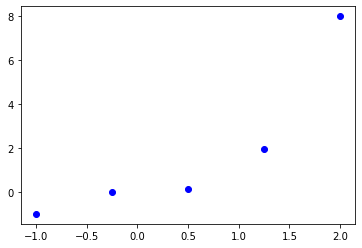

In [3]:
y = x**3
plt.plot(x,y,'bo')

In [6]:
f = interp.interp1d(x,y,kind="linear")

In [7]:
type(f)

scipy.interpolate.interpolate.interp1d

In [8]:
f(0.2)

array(0.06875)

In [10]:
f(1.8)

array(6.3875)

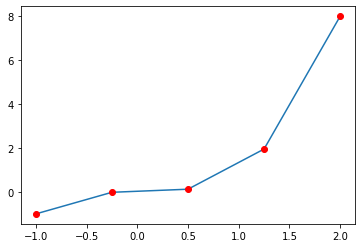

In [9]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))
plt.plot(x,y,'ro')

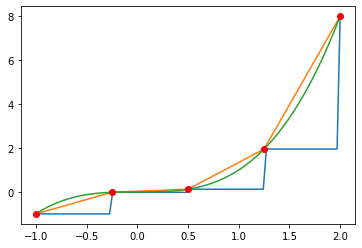

In [11]:
plt.plot(x_fine, interp.interp1d(x,y,kind="zero")(x_fine))
plt.plot(x_fine, interp.interp1d(x,y,kind="linear")(x_fine))
plt.plot(x_fine, interp.interp1d(x,y,kind="cubic")(x_fine))
plt.plot(x,y,'ro')

In [12]:
interp.interp1d?

In [13]:
interp.interp2d?

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters 

In [14]:
from scipy import optimize

In [27]:
def f(x):
    return x**4 - 10*x**2

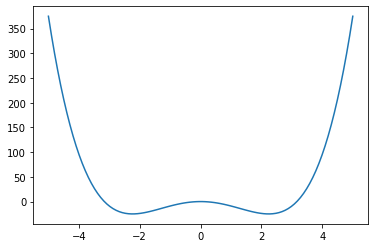

In [16]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x));

In [17]:
results = optimize.minimize(f, 4)
results

      fun: -24.99999999999999
 hess_inv: array([[0.02496788]])
      jac: array([1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([2.236068])

In [18]:
optimize.minimize?

In [19]:
x_opt = results.x

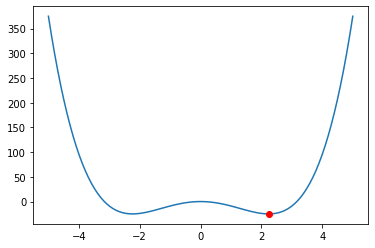

In [20]:
plt.plot(x,f(x));
plt.plot(x_opt,f(x_opt),'ro');

In [29]:
results = optimize.minimize(f, -3)
results

      fun: -24.99999999999999
 hess_inv: array([[0.02502251]])
      jac: array([-4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-2.236068])

In [30]:
x_opt = results.x

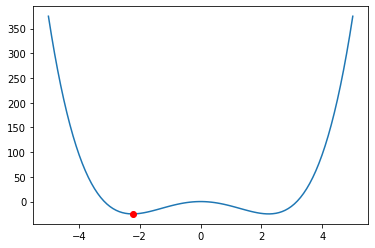

In [31]:
plt.plot(x,f(x));
plt.plot(x_opt,f(x_opt),'ro');

In [33]:
def f(x):
    return x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) + np.sin(2*x[1]))

In [22]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)

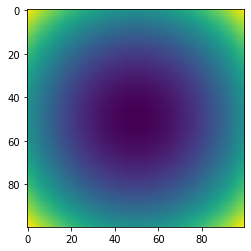

In [23]:
plt.imshow(X**2 + Y**2)

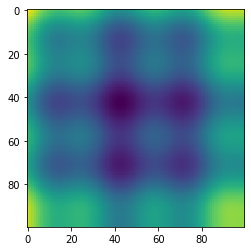

In [24]:
plt.imshow(f(np.array([X,Y])))

In [25]:
optimize.minimize(f, x0=[-1,1])

      fun: -4.399749751160589
 hess_inv: array([[4.59626790e-02, 1.55398036e-05],
       [1.55398036e-05, 4.98006505e-02]])
      jac: array([1.19209290e-07, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 56
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([-0.71377589,  2.13554767])

In [34]:
optimize.minimize(f,x0=[-4,-2])

      fun: 4.516369840169455
 hess_inv: array([[0.06189492, 0.00018857],
       [0.00018857, 0.04545633]])
      jac: array([-4.76837158e-07,  7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([-3.53444566, -0.71377587])

## Curve Fitting

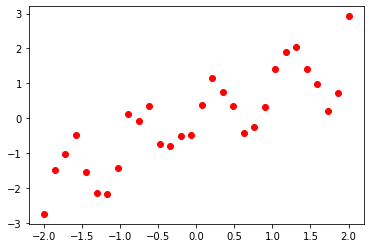

In [36]:
x = np.linspace(-2,2,30)
y = x+np.sin(6.5*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [37]:
def f(x,a,b):
    return a*x + b

In [38]:
((a,b),_) = optimize.curve_fit(f,x,y,(0,0))
a,b

(0.8976205641670714, -0.045925239106222475)

In [39]:
optimize.curve_fit?

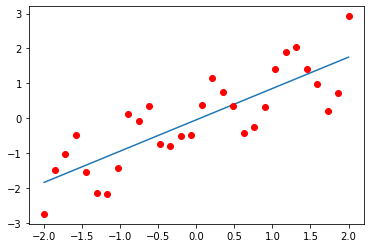

In [40]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b))
plt.plot(x,y,'ro')

In [41]:
def g(x,a,b,c):
    return a*x + b*np.sin(c*x)

In [42]:
y

array([-2.74504436, -1.48496574, -1.03129471, -0.46946926, -1.55249801,
       -2.15367672, -2.18573919, -1.43457282,  0.10922907, -0.07738058,
        0.3437781 , -0.73218004, -0.78824068, -0.50766215, -0.48684155,
        0.36763374,  1.13853225,  0.75715866,  0.35428197, -0.41160927,
       -0.25688099,  0.30964679,  1.39637423,  1.91030942,  2.0403285 ,
        1.39715962,  0.97189619,  0.21218174,  0.70973394,  2.92205468])

In [43]:
((a,b,c),_) = optimize.curve_fit(g,x,y,(0,0,6))
a,b,c

(0.9586080401526125, 0.9829569153362093, 6.514876602394314)

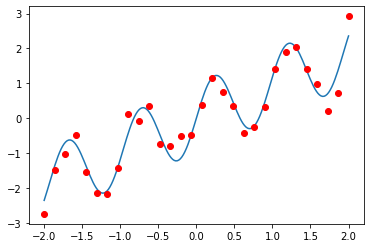

In [44]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,g(x_fine,a,b,c))
plt.plot(x,y,'ro')

## Root Finding

In [45]:
def f(x):
    return np.sin(x)

In [46]:
optimize.root(f,-1)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-5.73971851e-42])
       r: array([-1.])
  status: 1
 success: True
       x: array([0.])

In [47]:
res = optimize.root(f,-6)

In [48]:
res.x

array([-6.28318531])

## Linear programming
A very common case is linear programming (LP). These are optimization problems that can be written in the form

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors.

## Exercise
Using Google and reading documentation are important parts of programming. `scipy.optimize` comes with specialized functions for solving linear programming problems.

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

Note that the problem is equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^T x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad 
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because 
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix} 
$$

In [49]:
c = np.array([1, 2])
c

array([1, 2])

In [53]:
A_ub = np.array([[1, 0], [-5, -1]])
A_ub

array([[ 1,  0],
       [-5, -1]])

In [54]:
b_ub = np.array([1, 0])
b_ub

array([1, 0])

In [59]:
A_eq = np.zeros((2,2))
b_eq = np.zeros((1,2))

In [67]:
res = optimize.linprog(c, A_ub, b_ub, A_eq, b_eq)
# see below the results with bounds = None

In [62]:
res

     con: array([0., 0.])
     fun: 6.20220674315081e-12
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.00000000e+00, 1.75736092e-11])
  status: 0
 success: True
       x: array([3.21611241e-12, 1.49304717e-12])

In [64]:
res.x

array([3.21611241e-12, 1.49304717e-12])

In [65]:
res = optimize.linprog(c, A_ub, b_ub, bounds=[(None,None),(None,None)])

In [66]:
res.x

array([ 1., -5.])

## Statistics : `scipy.stats`

In [68]:
from scipy import stats

Find the maximum likelihood estimate for parameters

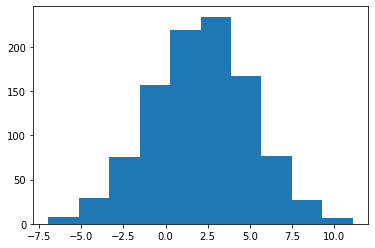

In [77]:
samples = 3 * np.random.randn(1000) + 2
plt.hist(samples);

In [78]:
stats.norm.fit(samples)

(2.0980463134750758, 2.981795220016337)

In [81]:
a = np.random.randn(300)
b = np.random.randn(300) + 0.1

In [82]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-2.41225897819412, pvalue=0.016154046457847626)

You can also perform kernel density estimation

In [84]:
x = np.hstack(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

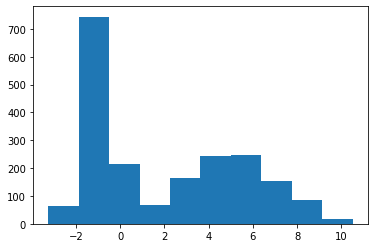

In [88]:
plt.hist(x);

In [89]:
pdf = stats.kde.gaussian_kde(x)

In [90]:
type(pdf)

scipy.stats.kde.gaussian_kde

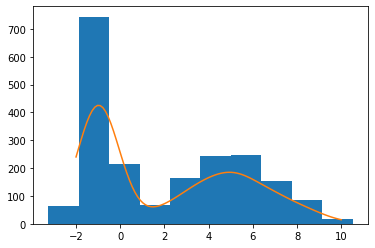

In [91]:
counts, bins, _ = plt.hist(x)
x_fine = np.linspace(-2,10,100)
plt.plot(x_fine, np.sum(counts) * pdf(x_fine))

## Numerical Integration : `scipy.integrate`

In [93]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [94]:
def f(x):
    return x**2 + 5*x + np.sin(x)

In [95]:
integ.quad(f,-1,1)

(0.6666666666666667, 6.547013372677054e-14)

In [96]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [103]:
def f(y,t):
    return (y[1], -y[1] - 9*y[0])

In [106]:
t = np.linspace(0,10,100)
Y = integ.odeint(f,[1,1],t)

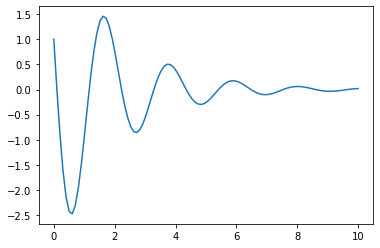

In [107]:
plt.plot(t,Y[:,1])

In [108]:
t = np.linspace(0,10,10)
t2 = np.linspace(0,10,100)
Y = integ.odeint(f,[1,1],t)
Y2 = integ.odeint(f,[1,1],t2)

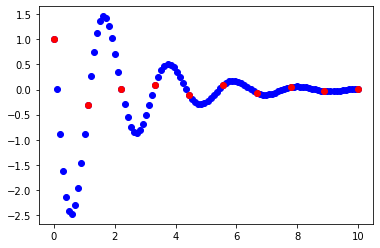

In [109]:
plt.plot(t2,Y2[:,1],'bo')
plt.plot(t,Y[:,1],'ro')